In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# URL of the Seeds dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Column names as per UCI documentation
columns = ['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
           'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
           'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']

# Load the dataset
df = pd.read_csv(url, sep=",", header=None, names=columns)
X = df.drop("Class", axis=1)


In [4]:
# Preprocessing combinations
def preprocess(X, methods):
    X_new = X.copy()
    if 'transform' in methods:
        X_new = PowerTransformer().fit_transform(X_new)
    if 'normalize' in methods:
        X_new = StandardScaler().fit_transform(X_new)
    if 'pca' in methods:
        X_new = PCA(n_components=2).fit_transform(X_new)
    return X_new

preprocessing_configs = {
    'No Processing': [],
    'Normalization': ['normalize'],
    'Transform': ['transform'],
    'PCA': ['pca'],
    'Transform+Norm': ['transform', 'normalize'],
    'T+N+PCA': ['transform', 'normalize', 'pca']
}

# Clustering methods
clustering_algorithms = {
    'KMeans': lambda n: KMeans(n_clusters=n, random_state=42),
    'Hierarchical': lambda n: AgglomerativeClustering(n_clusters=n),
    'MeanShift': lambda _: MeanShift()
}

cluster_sizes = [3, 4, 5]  # For MeanShift, size is ignored

results = []

for algo_name, algo_func in clustering_algorithms.items():
    for prep_name, prep_methods in preprocessing_configs.items():
        X_prep = preprocess(X, prep_methods)
        for c in cluster_sizes:
            if algo_name == 'MeanShift' and c != 3:
                continue  # Run MeanShift only once per preprocessing config

            model = algo_func(c)
            labels = model.fit_predict(X_prep)

            silhouette = silhouette_score(X_prep, labels)
            ch_score = calinski_harabasz_score(X_prep, labels)
            db_score = davies_bouldin_score(X_prep, labels)

            results.append({
                'Algorithm': algo_name,
                'Preprocessing': prep_name,
                'Clusters': c,
                'Silhouette': round(silhouette, 3),
                'Calinski-Harabasz': round(ch_score, 2),
                'Davies-Bouldin': round(db_score, 2)
            })

# Convert to DataFrame
df_results = pd.DataFrame(results)
pd.set_option('display.max_rows', None)
df_results

,Algorithm,Preprocessing,Clusters,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,KMeans,No Processing,3,0.560,497.00,0.55
1,KMeans,No Processing,4,0.567,696.84,0.55
2,KMeans,No Processing,5,0.508,745.20,0.57
3,KMeans,Normalization,3,0.285,70.94,1.39
4,KMeans,Normalization,4,0.254,52.76,1.70
5,KMeans,Normalization,5,0.184,45.86,1.91
6,KMeans,Transform,3,0.301,73.11,1.36
7,KMeans,Transform,4,0.256,55.82,1.77
8,KMeans,Transform,5,0.217,46.59,1.93
9,KMeans,PCA,3,0.560,497.57,0.55


## Barplots

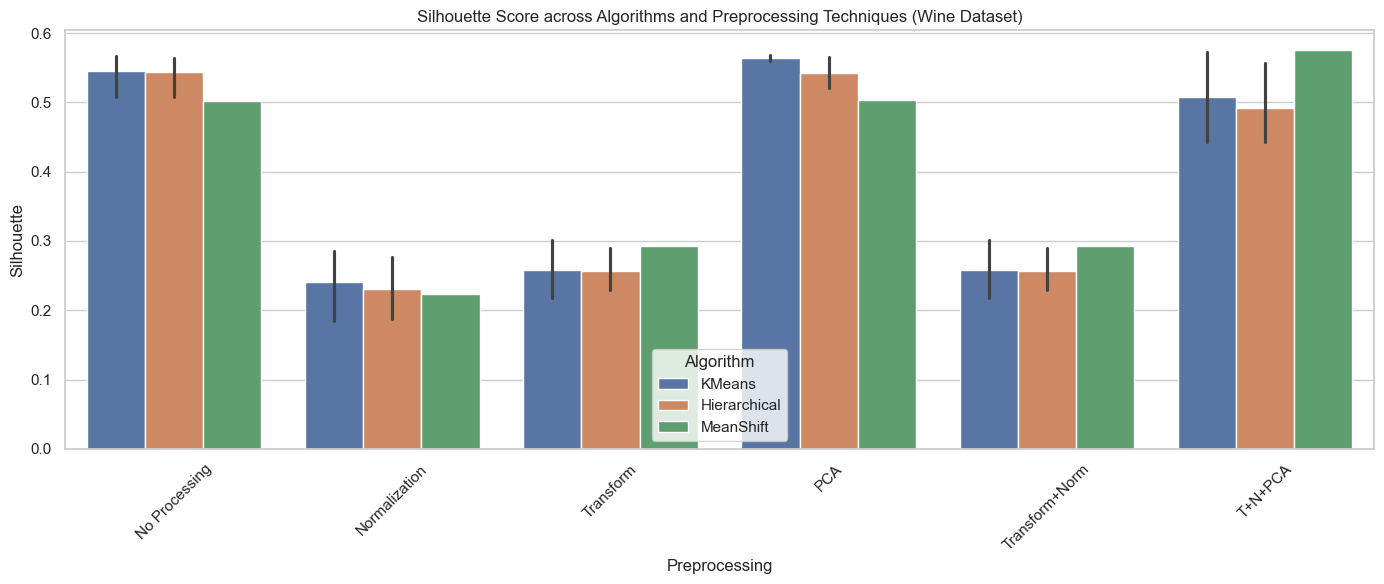

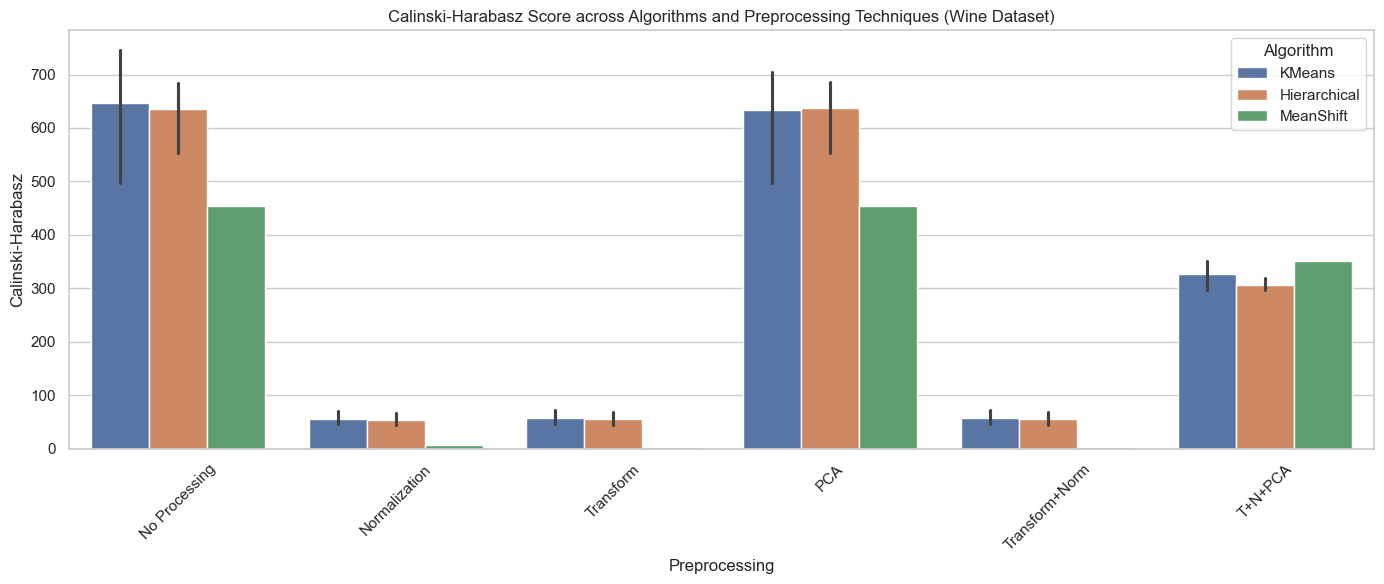

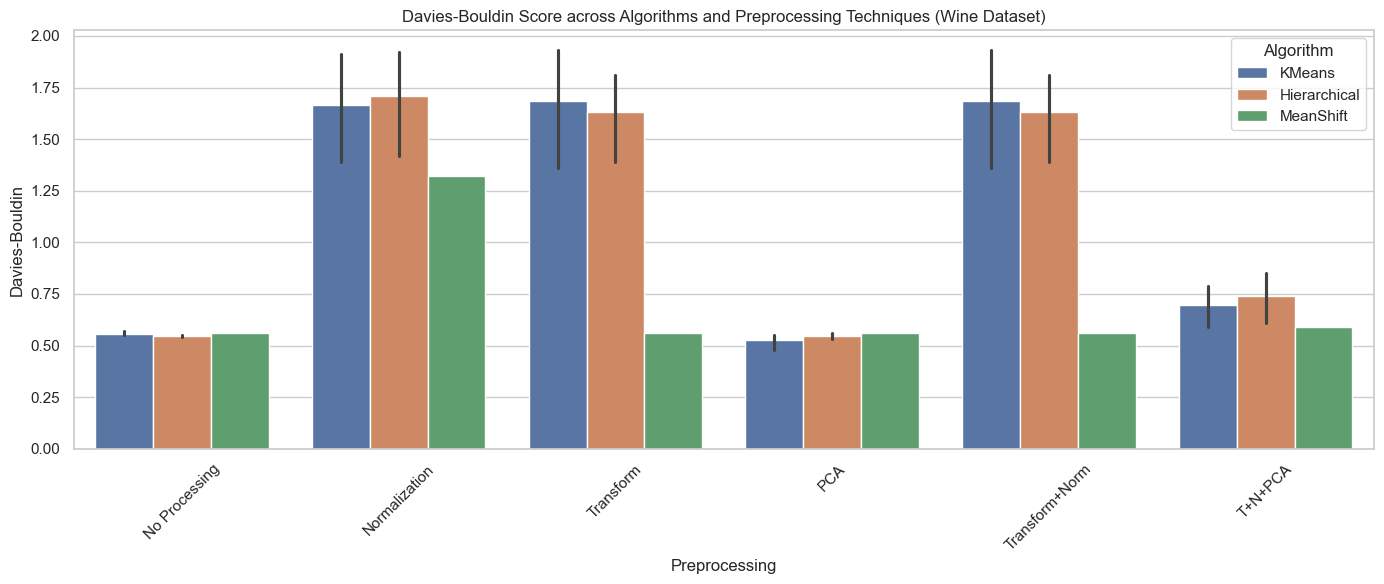

📊 Best Clustering Technique Summary:
➡️  Algorithm         : KMeans
🧼 Preprocessing      : PCA
#️⃣  Number of Clusters: N/A


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
metrics = ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']

for metric in metrics:
    plt.figure(figsize=(14, 6))
    sns.barplot(x='Preprocessing', y=metric, hue='Algorithm', data=df_results)
    plt.title(f'{metric} Score across Algorithms and Preprocessing Techniques (Wine Dataset)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Adjust Davies-Bouldin to be minimized (lower is better), so we invert the ranking
df_ranked = df_results.copy()

# Ranking (higher is better for Silhouette and Calinski-Harabasz)
df_ranked['Silhouette_rank'] = df_ranked['Silhouette'].rank(ascending=False)
df_ranked['Calinski-Harabasz_rank'] = df_ranked['Calinski-Harabasz'].rank(ascending=False)

# Ranking (lower is better for Davies-Bouldin)
df_ranked['Davies-Bouldin_rank'] = df_ranked['Davies-Bouldin'].rank(ascending=True)

# Calculate average rank
df_ranked['Average_rank'] = df_ranked[[
    'Silhouette_rank', 'Calinski-Harabasz_rank', 'Davies-Bouldin_rank'
]].mean(axis=1)

# Find the row with the best average rank
best_row = df_ranked.loc[df_ranked['Average_rank'].idxmin()]

# Print result
print("📊 Best Clustering Technique Summary:")
print(f"➡️  Algorithm         : {best_row['Algorithm']}")
print(f"🧼 Preprocessing      : {best_row['Preprocessing']}")
print(f"#️⃣  Number of Clusters: {best_row['n_clusters'] if 'n_clusters' in best_row else 'N/A'}")




## Heatmaps

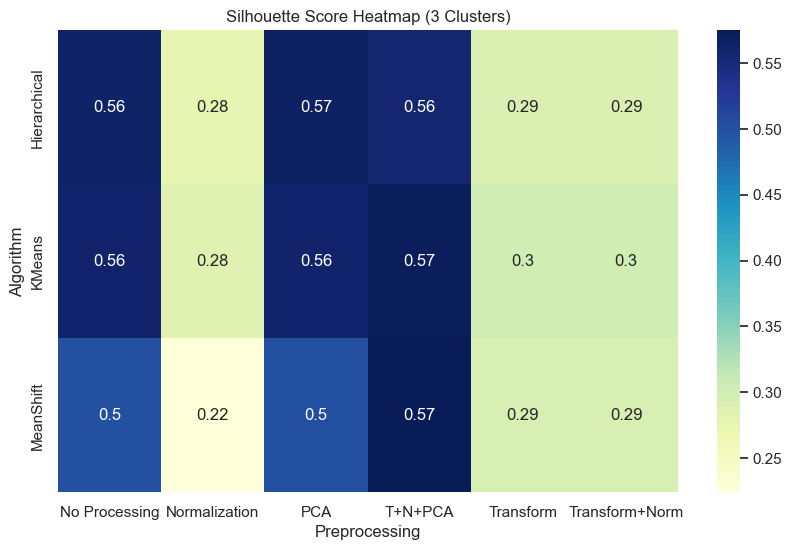

In [9]:
pivot_silhouette = df_results[df_results['Clusters'] == 3].pivot(
    index="Algorithm", columns="Preprocessing", values="Silhouette")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_silhouette, annot=True, cmap="YlGnBu")
plt.title("Silhouette Score Heatmap (3 Clusters)")
plt.show()


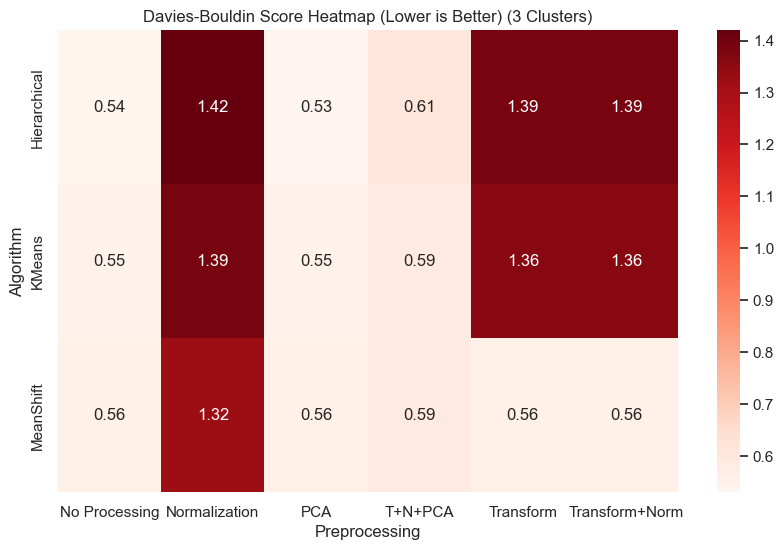

In [10]:
pivot_db = df_results[df_results['Clusters'] == 3].pivot(
    index="Algorithm", columns="Preprocessing", values="Davies-Bouldin")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_db, annot=True, cmap="Reds", fmt=".2f")
plt.title("Davies-Bouldin Score Heatmap (Lower is Better) (3 Clusters)")
plt.show()


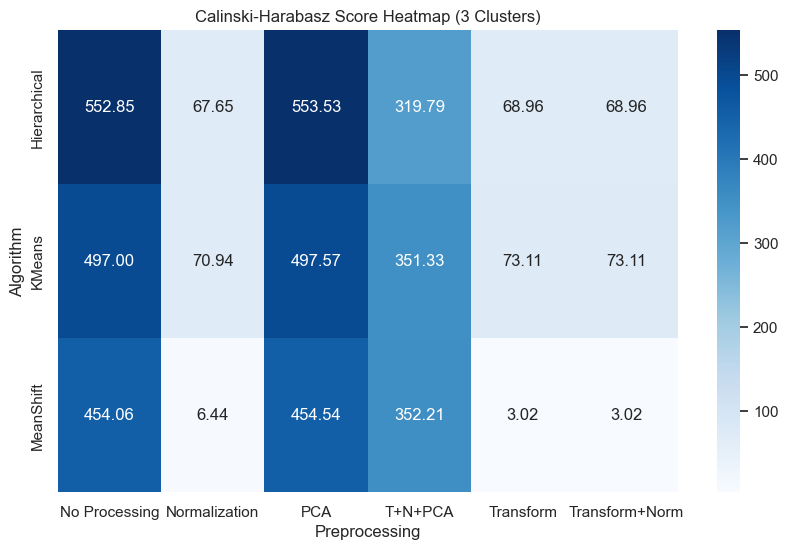

In [11]:
pivot_ch = df_results[df_results['Clusters'] == 3].pivot(
    index="Algorithm", columns="Preprocessing", values="Calinski-Harabasz")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_ch, annot=True, cmap="Blues", fmt=".2f")
plt.title("Calinski-Harabasz Score Heatmap (3 Clusters)")
plt.show()
